**SPORTS PRODUCT ANALYSIS**

In this notebook, I will undertake the role of a product analyst for an online sports clothing company. The company is specifically interested in how it can improve revenue. I use product data such as pricing, reviews, descriptions, and ratings, as well as revenue and website traffic, to produce recommendations for its marketing and sales teams. 

The four datasets I investigated are as follows:

#  brands.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `brand` | Brand of the product | 

# finance.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `listing_price` | Original price of the product | 
| `sale_price` | Discounted price of the product |
| `discount` | Discount off the listing price, as a decimal | 
| `revenue` | Revenue generated by the product |

# info.csv

| Columns | Description |
|---------|-------------|
| `product_name` | Name of the product | 
| `product_id` | Unique product identifier |
| `description` | Description of the product |

# reviews.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `rating` | Average product rating | 
| `reviews` | Number of reviews for the product |

Firstly, read in datafiles and clean dataframes.

In [2]:
import pandas as pd

brands = pd.read_csv("brands.csv") 
finance = pd.read_csv("finance.csv")
info = pd.read_csv("info.csv")
reviews = pd.read_csv("reviews.csv")

# Start coding here...

In [3]:
#consolidate the brands and info dataframes
brands_info = pd.merge(brands, info, on='product_id', how='left')

In [4]:
brands_info.head(10)

,product_id,brand,product_name,description
0,AH2430,NaN,NaN,NaN
1,G27341,Adidas,Women's adidas Originals Sleek Shoes,"A modern take on adidas sport heritage, tailor..."
2,CM0081,Adidas,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...
3,B44832,Adidas,Women's adidas Sport Inspired Questar Ride Shoes,"Inspired by modern tech runners, these women's..."
4,D98205,Adidas,Women's adidas Originals Taekwondo Shoes,This design is inspired by vintage Taekwondo s...
5,B75586,Adidas,Women's adidas Sport Inspired Duramo Lite 2.0 ...,Refine your interval training in these women's...
6,CG4051,Adidas,Women's adidas Sport Inspired Duramo Lite 2.0 ...,Refine your interval training in these women's...
7,CM0080,Adidas,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...
8,B75990,Adidas,WOMEN'S ADIDAS RUNNING DURAMO 9 SHOES,These women's neutral running shoes will get y...
9,EE5761,Adidas,Men's adidas Originals Forest Grove Shoes,The Forest Grove brings back the look of the a...


In [5]:
#consolidate the brand information df with the finance df
brands_info_fin = pd. merge(brands_info, finance, on='product_id', how='left')
brands_info_fin.head(10)

,product_id,brand,product_name,description,listing_price,sale_price,discount,revenue
0,AH2430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,G27341,Adidas,Women's adidas Originals Sleek Shoes,"A modern take on adidas sport heritage, tailor...",75.99,37.99,0.5,1641.17
2,CM0081,Adidas,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...,9.99,5.99,0.4,398.93
3,B44832,Adidas,Women's adidas Sport Inspired Questar Ride Shoes,"Inspired by modern tech runners, these women's...",69.99,34.99,0.5,2204.37
4,D98205,Adidas,Women's adidas Originals Taekwondo Shoes,This design is inspired by vintage Taekwondo s...,79.99,39.99,0.5,5182.70
5,B75586,Adidas,Women's adidas Sport Inspired Duramo Lite 2.0 ...,Refine your interval training in these women's...,47.99,19.20,0.6,1555.20
6,CG4051,Adidas,Women's adidas Sport Inspired Duramo Lite 2.0 ...,Refine your interval training in these women's...,47.99,23.99,0.5,86.36
7,CM0080,Adidas,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...,9.99,5.99,0.4,75.47
8,B75990,Adidas,WOMEN'S ADIDAS RUNNING DURAMO 9 SHOES,These women's neutral running shoes will get y...,55.99,27.99,0.5,806.11
9,EE5761,Adidas,Men's adidas Originals Forest Grove Shoes,The Forest Grove brings back the look of the a...,65.99,39.59,0.4,2779.22


In [6]:
#consolidate remaining df and label the final df as brands_final
brands_final = pd.merge(brands_info_fin, reviews, on='product_id', how='left')
brands_final.columns

Index(['product_id', 'brand', 'product_name', 'description', 'listing_price',
       'sale_price', 'discount', 'revenue', 'rating', 'reviews'],
      dtype='object')

In [7]:
brands_final.isnull().sum()

product_id        0
brand            59
product_name     59
description      62
listing_price    59
sale_price       59
discount         59
revenue          59
rating           59
reviews          59
dtype: int64

In [8]:
#drop rows with null values
brands_final = brands_final.dropna(thresh=10)
brands_final

,product_id,brand,product_name,description,listing_price,sale_price,discount,revenue,rating,reviews
1,G27341,Adidas,Women's adidas Originals Sleek Shoes,"A modern take on adidas sport heritage, tailor...",75.99,37.99,0.5,1641.17,3.3,24.0
2,CM0081,Adidas,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...,9.99,5.99,0.4,398.93,2.6,37.0
3,B44832,Adidas,Women's adidas Sport Inspired Questar Ride Shoes,"Inspired by modern tech runners, these women's...",69.99,34.99,0.5,2204.37,4.1,35.0
4,D98205,Adidas,Women's adidas Originals Taekwondo Shoes,This design is inspired by vintage Taekwondo s...,79.99,39.99,0.5,5182.70,3.5,72.0
5,B75586,Adidas,Women's adidas Sport Inspired Duramo Lite 2.0 ...,Refine your interval training in these women's...,47.99,19.20,0.6,1555.20,1.0,45.0
...,...,...,...,...,...,...,...,...,...,...
3174,AT6100-606,Nike,Nike Tiempo Legend 8 Academy TF,The Nike Tiempo Legend 8 Academy TF takes the ...,0.00,64.95,0.0,0.00,0.0,0.0
3175,CT9155-063,Nike,Nike React Metcon AMP,The Nike React Metcon AMP takes the stability ...,0.00,139.95,0.0,251.91,3.0,1.0
3176,CI1236-100,Nike,Air Jordan 8 Retro,The Air Jordan 8 Retro recaptures the memorabl...,159.95,127.97,0.0,230.35,5.0,1.0
3177,AH6799-300,Nike,Nike Air Max 98,The Nike Air Max 98 features the OG design lin...,0.00,169.95,0.0,1223.64,4.0,4.0


Q1. What is the volume of products and average revenue for Adidas and Nike products based on listing price quartiles?

In [9]:
#calculate quartile values
brands_final['listing_price'].quantile([0.25, 0.50, 0.75])

0.25    45.99
0.50    59.99
0.75    89.99
Name: listing_price, dtype: float64

In [10]:
#seperate listing prices into 4 quartiles 
brands_final['price_label'] = pd.qcut(brands_final['listing_price'], q=4, labels=['Budget', 'Average', 'Expensive', 'Elite'])
brands_final.head()

,product_id,brand,product_name,description,listing_price,sale_price,discount,revenue,rating,reviews,price_label
1,G27341,Adidas,Women's adidas Originals Sleek Shoes,"A modern take on adidas sport heritage, tailor...",75.99,37.99,0.5,1641.17,3.3,24.0,Expensive
2,CM0081,Adidas,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...,9.99,5.99,0.4,398.93,2.6,37.0,Budget
3,B44832,Adidas,Women's adidas Sport Inspired Questar Ride Shoes,"Inspired by modern tech runners, these women's...",69.99,34.99,0.5,2204.37,4.1,35.0,Expensive
4,D98205,Adidas,Women's adidas Originals Taekwondo Shoes,This design is inspired by vintage Taekwondo s...,79.99,39.99,0.5,5182.70,3.5,72.0,Expensive
5,B75586,Adidas,Women's adidas Sport Inspired Duramo Lite 2.0 ...,Refine your interval training in these women's...,47.99,19.20,0.6,1555.20,1.0,45.0,Average


In [11]:
#create a df that shows the mean revenues of different price labels/categories belonging to nike and ad
adidas_vs_nike = brands_final.groupby(
    ['brand', 'price_label'], as_index=False, sort=False).agg(
    num_products = ('price_label', 'count'), 
    mean_revenue = ('revenue', 'mean')
).round(2).reset_index(drop=True)
adidas_vs_nike

,brand,price_label,num_products,mean_revenue
0,Adidas,Expensive,574,2015.68
1,Adidas,Budget,655,3035.30
2,Adidas,Average,759,4621.56
3,Adidas,Elite,587,8302.78
4,Nike,Budget,357,1596.33
5,Nike,Expensive,8,675.59
6,Nike,Elite,47,500.56
7,Nike,Average,130,1367.45


Plot graphs that show the mean revenues of different price labels/categories belonging to Nike and Adidas

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#filter the df for nike and adidas
nike = adidas_vs_nike[ adidas_vs_nike['brand'] == 'Nike']
adidas = adidas_vs_nike [adidas_vs_nike['brand'] == 'Adidas']

#make sure price_labels are sorted from budget to elite
price_label_order = ['Budget', 'Average', 'Expensive', 'Elite']

# Convert the "price_label" column to categorical with the desired order
nike['price_label'] = pd.Categorical(nike['price_label'], categories=price_label_order, ordered=True)
adidas['price_label'] = pd.Categorical(adidas['price_label'], categories=price_label_order, ordered=True)

#sort DF by the categorical price_label column
nike = nike.sort_values('price_label')
adidas = adidas.sort_values('price_label')

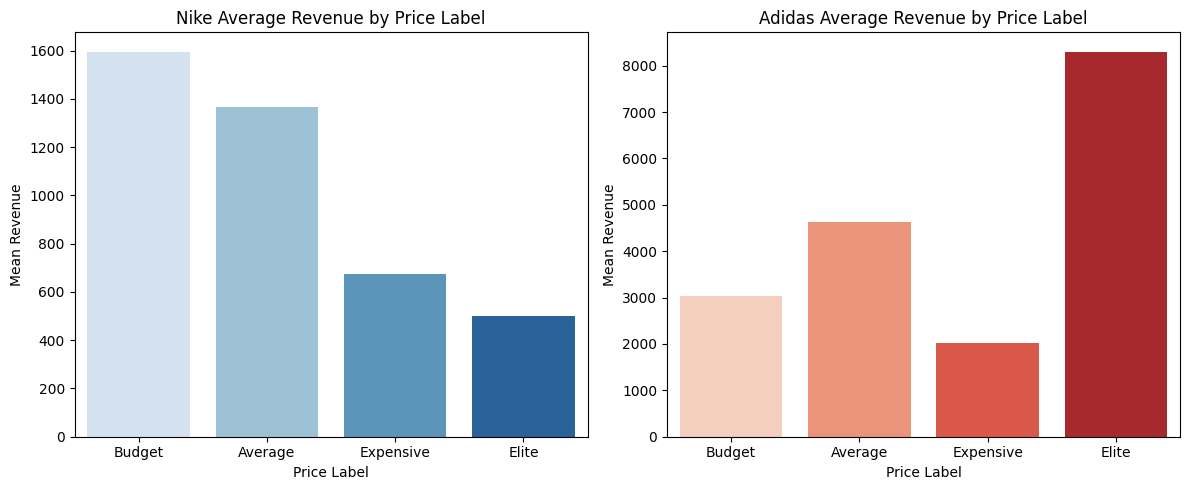

In [14]:
#create subplots
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,5) )

#plot nike data
sns.barplot(data=nike, x='price_label', y='mean_revenue', ax=axes[0], palette='Blues')
axes[0].set_title('Nike Average Revenue by Price Label')
axes[0].set_xlabel('Price Label')
axes[0].set_ylabel('Mean Revenue')

#plot adidas data
sns.barplot(data=adidas, x='price_label', y='mean_revenue', ax=axes[1], palette='Reds')
axes[1].set_title('Adidas Average Revenue by Price Label')
axes[1].set_xlabel('Price Label')
axes[1].set_ylabel('Mean Revenue')

plt.tight_layout()
plt.show()

**When looking at Nike products, on average the company generates more revenue from budget-friendly products and average-priced products as compared to their expensive and elite products. On the other hand, when assessing Adidas products, we see the company generates the most mean revenue from their elite-priced products and their average-priced products as compared to budget-friendly and expensive products.** 

**From the plot, we see that on average the store's Adidas products have more revenue-generating capabilities as compared to Nike Products.**

Q2. Do any differences exist between the word count of a product's description and its mean rating?

In [15]:
#find description length of all the company's products
brands_final['description_length'] = brands_final['description'].str.len()

In [16]:
#what is the maximum length a description can be?
max(brands_final['description'].str.len())

687

In [17]:
#to simplify our analysis, we create bins for our description lengths up to 700
bins = [0, 100, 200, 300, 400, 500, 600, 700]
labels = ['100', '200', '300', '400', '500', '600', '700']

brands_final['description_length'] = pd.cut(brands_final['description_length'], bins=bins, labels=labels)
brands_final.head(2)

,product_id,brand,product_name,description,listing_price,sale_price,discount,revenue,rating,reviews,price_label,description_length
1,G27341,Adidas,Women's adidas Originals Sleek Shoes,"A modern take on adidas sport heritage, tailor...",75.99,37.99,0.5,1641.17,3.3,24.0,Expensive,200
2,CM0081,Adidas,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...,9.99,5.99,0.4,398.93,2.6,37.0,Budget,200


In [18]:
#group by lengths and introduce 2 new cols: mean_rating & num_reviews
description_lengths = brands_final.groupby('description_length', as_index=False).agg( mean_rating = ('rating', 'mean'), num_reviews =('reviews', 'count')).round(2)
description_lengths

,description_length,mean_rating,num_reviews
0,100,2.26,7
1,200,3.19,526
2,300,3.28,1785
3,400,3.29,651
4,500,3.35,118
5,600,3.12,15
6,700,3.65,15


,description_length,mean_rating,num_reviews
0,100,2.26,7
1,200,3.19,526
2,300,3.28,1785
3,400,3.29,651
4,500,3.35,118
5,600,3.12,15
6,700,3.65,15


**According to analysis, on average the longer the review description is for a product, the higher the rating will be. While shorter reviews under 200 characters are linked with much lower ratings. Additionally, there is a little variation between mean ratings when the description length is between 200 and 500 characters.**

Q3. How does the volume of products and median revenue vary between clothing and footwear?

In [20]:
#filter "description" for "shoe*", "trainer*", or "foot* for shoes category"
product_shoes = 'shoe*|trainer*| foot*'

shoes = brands_final[brands_final['description'].str.contains(product_shoes)]
shoes

,product_id,brand,product_name,description,listing_price,sale_price,discount,revenue,rating,reviews,price_label,description_length
1,G27341,Adidas,Women's adidas Originals Sleek Shoes,"A modern take on adidas sport heritage, tailor...",75.99,37.99,0.5,1641.17,3.3,24.0,Expensive,200
2,CM0081,Adidas,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...,9.99,5.99,0.4,398.93,2.6,37.0,Budget,200
3,B44832,Adidas,Women's adidas Sport Inspired Questar Ride Shoes,"Inspired by modern tech runners, these women's...",69.99,34.99,0.5,2204.37,4.1,35.0,Expensive,300
4,D98205,Adidas,Women's adidas Originals Taekwondo Shoes,This design is inspired by vintage Taekwondo s...,79.99,39.99,0.5,5182.70,3.5,72.0,Expensive,300
5,B75586,Adidas,Women's adidas Sport Inspired Duramo Lite 2.0 ...,Refine your interval training in these women's...,47.99,19.20,0.6,1555.20,1.0,45.0,Average,300
...,...,...,...,...,...,...,...,...,...,...,...,...
3165,807443-503,Nike,Nike Air Max 95 Premium,The Nike Air Max 95 Premium retains its iconic...,169.95,135.97,0.0,734.24,3.7,3.0,Elite,400
3169,CI3867-001,Nike,Nike Air Max 200,Inspired by energy patterns radiating from Ear...,0.00,99.95,0.0,0.00,0.0,0.0,Budget,300
3171,AT7968-606,Nike,Nike Mercurial Vapor 13 Club MG,The Nike Mercurial Vapor 13 Club MG wraps your...,0.00,49.95,0.0,0.00,0.0,0.0,Budget,200
3173,CD2722-001,Nike,Air Jordan 5 Retro,The Air Jordan 5 Retro for women gives a colou...,0.00,159.95,0.0,863.73,3.3,3.0,Budget,300


In [21]:
#filter description to choose products that are not shoes

clothes = brands_final[~brands_final.isin(shoes['product_id'])]
clothes.dropna(inplace=True)

In [22]:
#create DF showing how volume of products and median revenue vary between clothing and footwear

product_types = pd.DataFrame({
    'num_clothing_products' : len(clothes),
    'median_clothing_revenue' : clothes['revenue'].median(),
    'num_footwear_products' : len(shoes),
    'median_footwear_revenue' : shoes['revenue'].median()
}, index=[0])
product_types.head()

,num_clothing_products,median_clothing_revenue,num_footwear_products,median_footwear_revenue
0,540,608.155,2577,3131.48


**From analysis, it is evident that the store sold more clothing products and thus was able to enjoy more revenue from footwear sales as compared to clothing sales. It is important to figure out why these differencess have occured and find a way to close the revenue gap through appropriate measures.**